# Assignment 4: Benchmarking Fashion-MNIST with ANN

### CS 6316 Machine Learning - Department of Computer Science - University of Virginia
"The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others." - **Zalando Research, Github Repo.**"

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

![Here's an example how the data looks (each class takes three-rows):](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

In this assignment, you will attempt to benchmarking the Fashion-MNIST using ANNs. You must use it to train some neural networks on TensorFlow and predict the final output of 10 classes. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


---
## 1. PRE-PROCESSING THE DATA (20 pts)

You can load the Fashion MNIST directly from Tensorflow using the folliwng code:
    tf.keras.datasets.fashion_mnist.load_data();

Write some code to load the data file and take a quick look at the dataset, and output the following:
- How big is your dataset? (regarding MB)
- How many entries does it have?
- How many features does it have?
- What are some basic statistics you can learn right away about this dataset?

**Large-scale Visualization:** Demonstrate that this dataset is indeed a complex and high dimensional worthy of an attempt on TensorFlow. Again, is there any non-linearly separation among the classes? Discover and plot out all features among the features.

Size of dataset (MB): 52.40
Number of entries: 70000
Number of features: 784


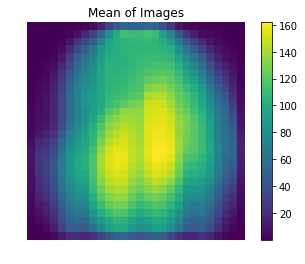

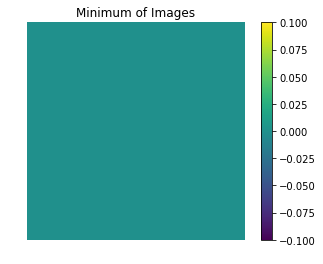

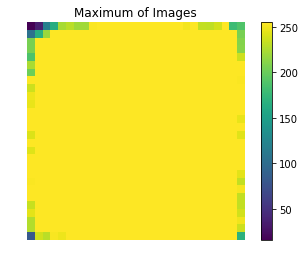

In [22]:
# You might want to use the following package
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Your code goes here for this section.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Print dataset statistics
print("Size of dataset (MB): %.2f" % ((X_train.nbytes + y_train.nbytes + X_test.nbytes + y_test.nbytes) / (2 ** 20)))
print("Number of entries:", len(X_train) + len(X_test))
print("Number of features:", X_train[0].shape[0] * X_train[0].shape[1])

plt.figure()
plt.imshow(np.mean(X_train, axis=0))
plt.title("Mean of Images")
plt.axis('off')
plt.colorbar()

plt.figure()
plt.imshow(np.min(X_train, axis=0))
plt.title("Minimum of Images")
plt.axis('off')
plt.colorbar()

plt.figure()
plt.imshow(np.max(X_train, axis=0))
plt.title("Maximum of Images")
plt.axis('off')
plt.colorbar()

# Scale data down to a fraction between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
          "Shirt", "Sneaker", "Bag", "Ankle Boot"]

- - -
## 2. CONSTRUCTION PHASE (25 pts)

Define at least three networks with different structures: Ensure the input layer has the right number of inputs. The best structure often is found through a process of trial and error experimentation:
- You may start with a fully connected network structure with two hidden layers.
- You may try a few activation functions to see if they affect the performance.
- You may use various optimizers to tweak the model parameters to minimize the cost function.

In [23]:
# Your code goes here

ann1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

ann2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(784, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

ann3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(784, activation=tf.nn.sigmoid),
    keras.layers.Dense(28, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

ann4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(90, activation=tf.nn.sigmoid),
    keras.layers.Dense(80, activation=tf.nn.sigmoid),
    keras.layers.Dense(70, activation=tf.nn.sigmoid),
    keras.layers.Dense(60, activation=tf.nn.sigmoid),
    keras.layers.Dense(50, activation=tf.nn.sigmoid),
    keras.layers.Dense(40, activation=tf.nn.sigmoid),
    keras.layers.Dense(30, activation=tf.nn.sigmoid),
    keras.layers.Dense(20, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

models = [ann1, ann2, ann3, ann4]

for model in models:
    model.compile(optimizer=tf.train.AdamOptimizer(),
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

# ann1.compile(optimizer=tf.train.AdamOptimizer(),
#             loss="sparse_categorical_crossentropy",
#             metrics=["accuracy"])

# ann2.compile(optimizer=tf.train.AdamOptimizer(),
#              loss="sparse_categorical_crossentropy",
#              metrics=["accuracy"])

# ann3.compile(optimizer=tf.train.AdamOptimizer(),
#              loss="sparse_categorical_crossentropy",
#              metrics=["accuracy"])

# ann4.compile(optimizer=tf.train.AdamOptimizer(),
#              loss="sparse_categorical_crossentropy",
#              metrics=["accuracy"])

- - -
## 3. EXECUTION PHASE (30 pts)

For each of the three models of your neural networks, open a TensorFlow session, define the number of epochs and size of the training batch (20 pts): For each model, you must compute the performance measures: Confusion Matrix and Class Accuracy.
- Which one yields the best performance measure for your dataset?
- You must be able to save the trained model and load it from disk to evaluate a test set


In [25]:
# Your code goes here

#ann1.fit(X_train, y_train, epochs=5)
#ann2.fit(X_train, y_train, epochs=5)
#ann3.fit(X_train, y_train, epochs=5)
#ann4.fit(X_train, y_train, epochs=5)

#test1_loss, test1_acc = ann1.evaluate(X_test, y_test)
#test2_loss, test2_acc = ann2.evaluate(X_test, y_test)
#test3_loss, test3_acc = ann3.evaluate(X_test, y_test)
#test4_loss, test4_acc = ann3.evaluate(X_test, y_test)
#print("Accuracy:", test4_acc)

# y_pred = ann3.predict_classes(X_test)
# confusion_matrix(y_test, y_pred)

i = 0
for model in models:
    model.fit(X_train, y_train, epochs=5)
    y_pred = model.predict_classes(X_test)
    print("Model", i, "accuracy:", accuracy_score(y_test, y_pred))
    print("Model", i, "confusion matrix:\n", confusion_matrix(y_test, y_pred))
    i += 1

Epoch 1/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.2800 - acc: 0.8960
Epoch 2/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.2680 - acc: 0.8999
Epoch 3/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.2580 - acc: 0.9037
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.2456 - acc: 0.9092
Epoch 5/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.2382 - acc: 0.9103
Model 0 accuracy: 0.8813
Model 0 confusion matrix:
 [[853   2   4   9   4   1 119   0   8   0]
 [  1 975   2  15   3   0   4   0   0   0]
 [ 13   2 736   4 114   0 129   0   2   0]
 [ 23  13   8 856  43   0  52   0   5   0]
 [  0   3  79  17 784   0 115   0   2   0]
 [  0   0   0   1   0 961   0  24   1  13]
 [117   3  59  12  49   0 750   0  10   0]
 [  0   0   0   0   0   9   0 962   0  29]
 [  4   0   6   3   3   4   5   2 973   0]
 [  0   0   0   1   0   7   1  28   0 963]]
Epoch 1/5
60000/60000 

- - -
## 4. FINETUNING THE NETWORK (20 pts)

You may be able to compare the performance of your method agaist other ML methods below:
http://fashion-mnist.s3-website.eu-central-1.amazonaws.com

To improve the performance of your ANN, you can use grid search with cross-validation to find the right set of hyperparameters, but that would take a lot of times (days, sometimes weeks). Therefore, you must make some decision of which reasonable values for each hyperparameter, so that you can restrict the search space. Here's a few decision about the network you have to made and justify:

- The number of hidden layers. Why did you pick this many?
- The number of neurons per hidden layers. Provide some justifiable reasons
- Which activation functions need to be used? Why?



- - -
## 5. OUTLOOK (5 pts)

Plan for the outlook of your system: This will lead to the direction of your future project:
- Did your neural network outperform other "traditional ML technique? Why/why not?
- Does your model work well for the future? If not, which model should be further investigated?
- Do you satisfy with your system? What do you think needed to improve?



- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS6316 Assignment 3:...".
 * More on the Fashion-MNIST to be found here: https://hanxiao.github.io/2018/09/28/Fashion-MNIST-Year-In-Review/

Best of luck and have fun!